In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def create_dataFrame(str):
    df = pd.read_csv(str)
    return df

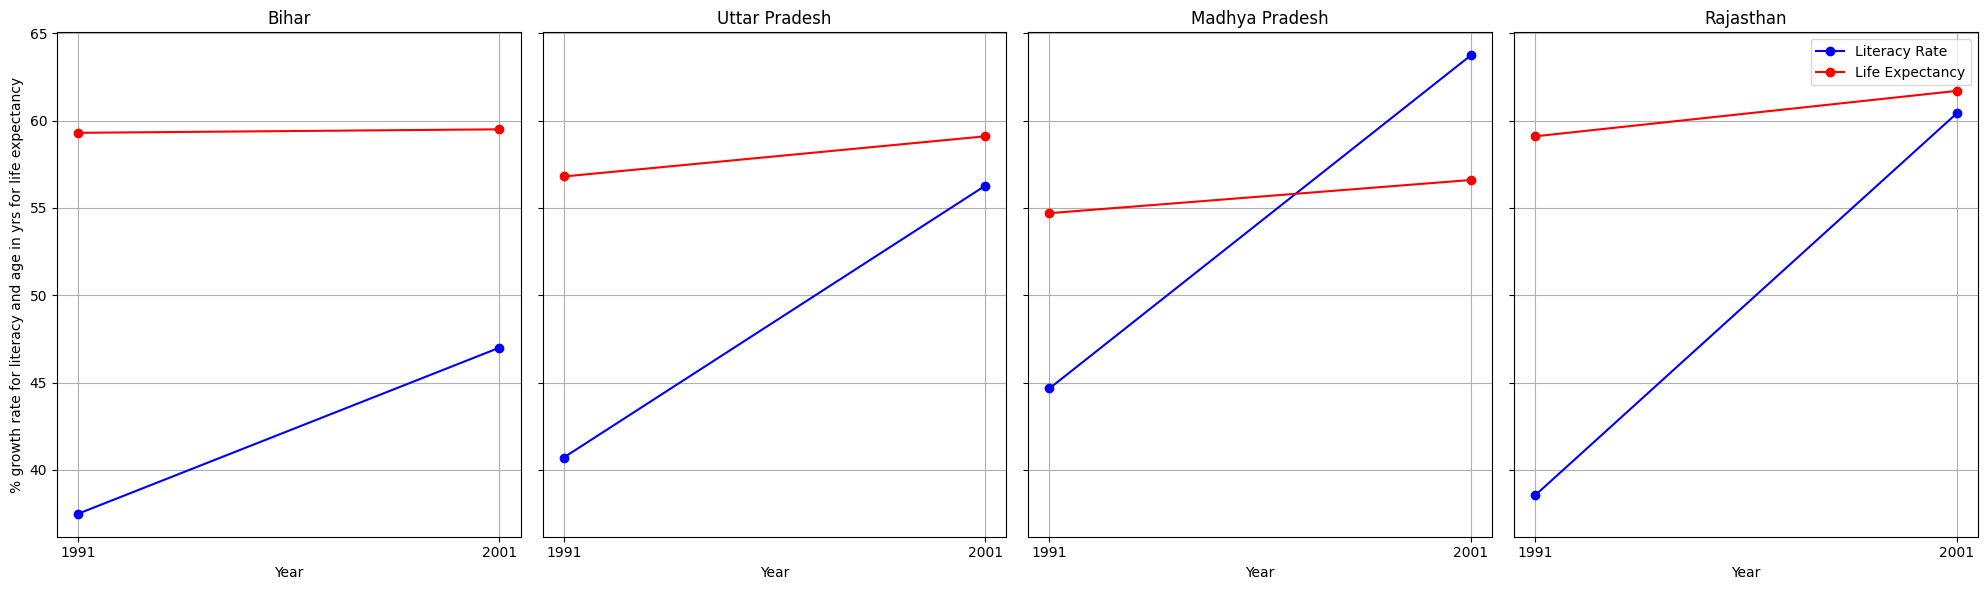

In [24]:
    # Declaring our model states array-:
    states = ['Bihar', 'Uttar Pradesh' , 'Madhya Pradesh' , 'Rajasthan']
    # Acquiring the data for only the relevant states
    df_literacy = create_dataFrame('literacy_rate.csv')
    df_literacy_states = df_literacy[df_literacy['State/UTs'].isin(states)]
    # Creating the dataFrame for life expectancy-:
    df_life_expectancy = create_dataFrame('life expectancy.csv')

    # Creating the subplots for all the states-:
    fig, axes = plt.subplots(1, 4, figsize=(20, 6), sharey=True)

    # Calling the function to plot the data-:
    plot_literacy_and_life_expectancy_data(states , df_literacy_states , df_life_expectancy , fig, axes)

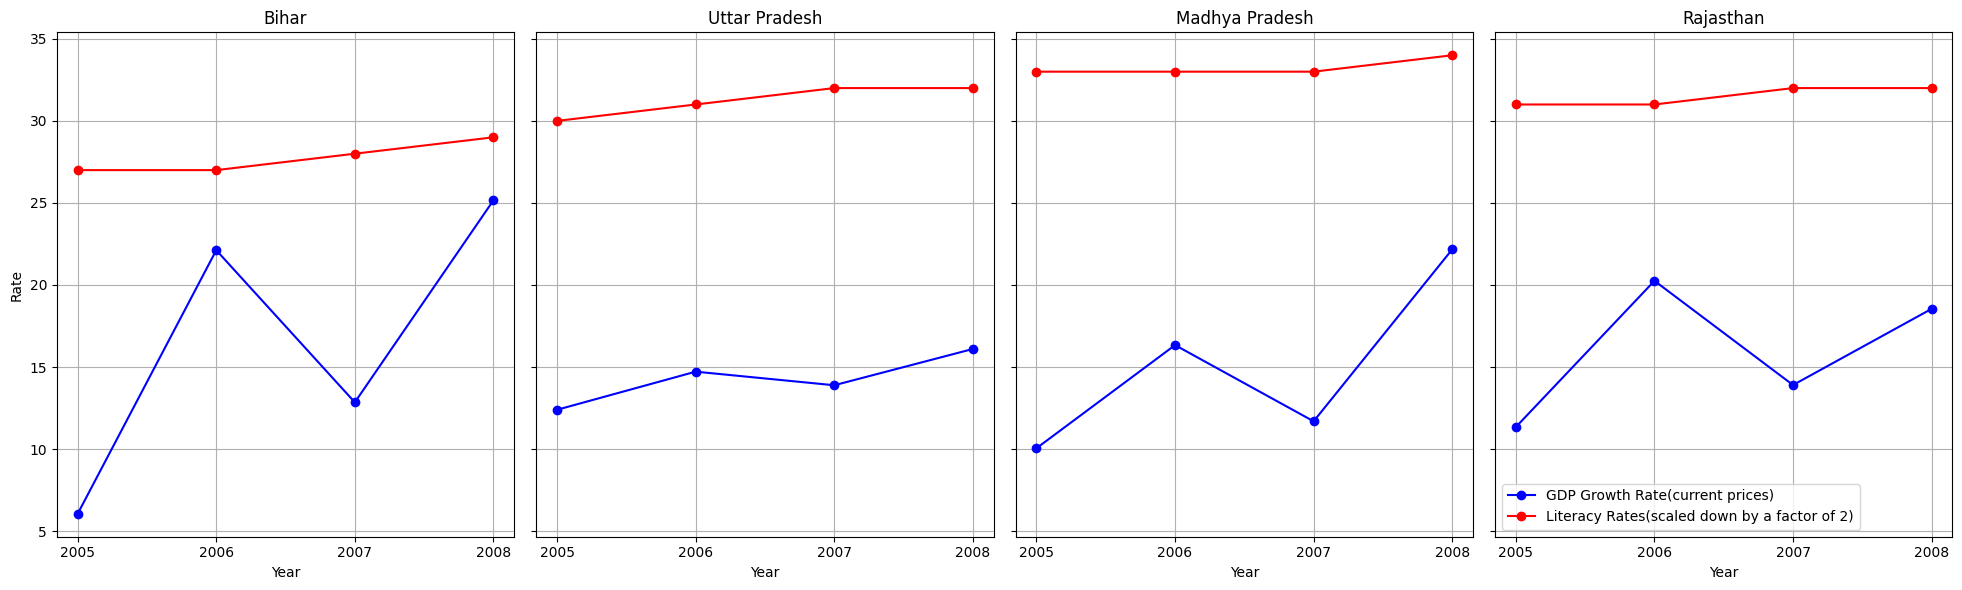

In [25]:
    # Declaring our model states array-:
    states = ['Bihar', 'Uttar Pradesh' , 'Madhya Pradesh' , 'Rajasthan']
    # Acquiring the data for only the relevant states
    df_literacy = create_dataFrame('literacy_rate.csv')
    df_literacy_states = df_literacy[df_literacy['State/UTs'].isin(states)]
    # Creating the dataFrame for GDP at current prices
    df_GDP_current_prices = create_dataFrame('GDP current prices.csv')

    # Acquiring the data for our relevant states-:
    df_GDP_current_prices_states = df_GDP_current_prices[df_GDP_current_prices['A'].isin(states)]

    # Creating the subplots for all the states-:
    fig, axes = plt.subplots(1, 4, figsize=(20, 6), sharey=True)

    # Calling the function to plot the data-:
    plot_literacy_and_GDP_Growth_rate(states , df_literacy_states , df_GDP_current_prices_states , fig, axes)

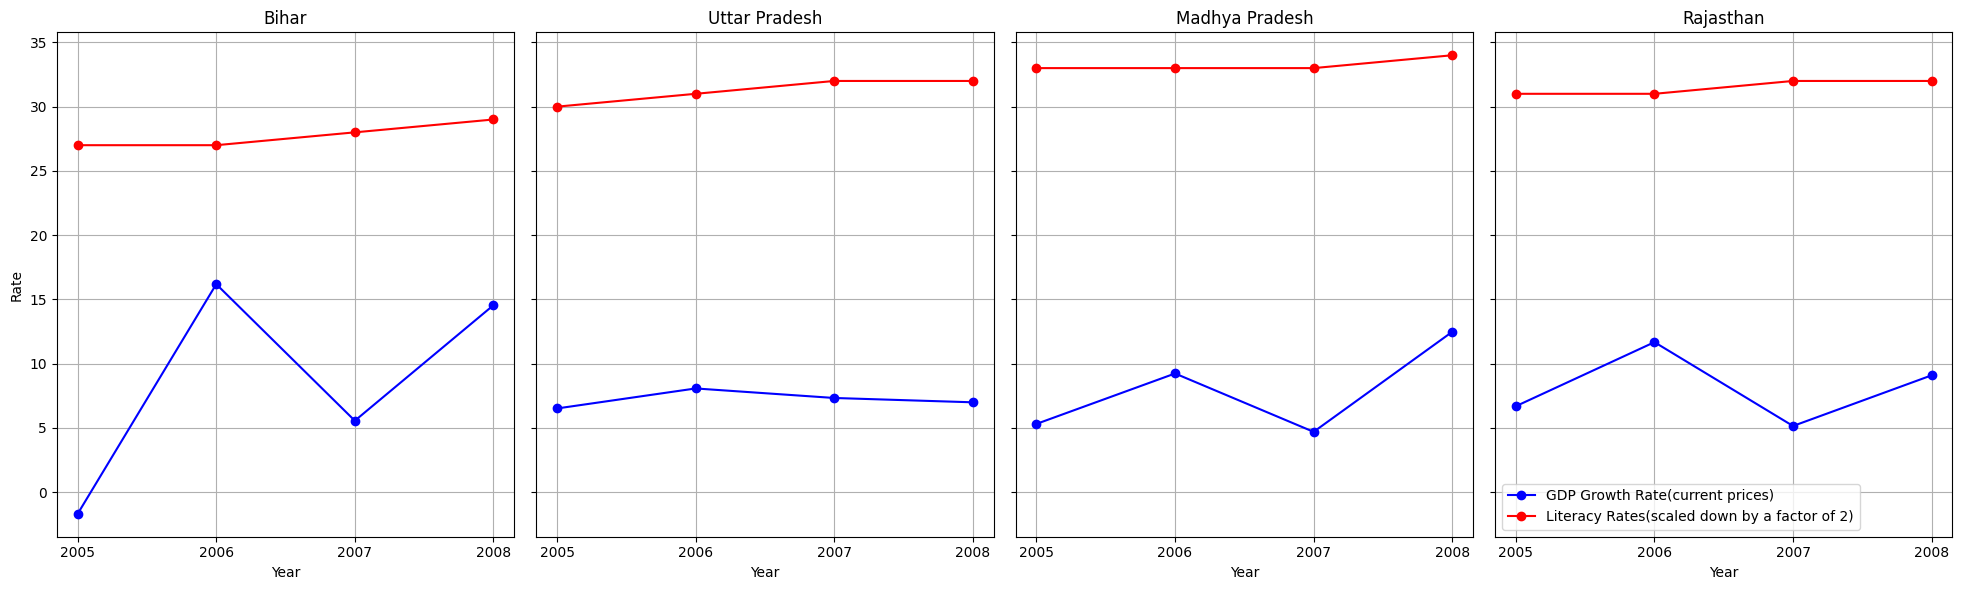

In [26]:
    # Declaring our model states array-:
    states = ['Bihar', 'Uttar Pradesh' , 'Madhya Pradesh' , 'Rajasthan']
    # Acquiring the data for only the relevant states
    df_literacy = create_dataFrame('literacy_rate.csv')
    df_literacy_states = df_literacy[df_literacy['State/UTs'].isin(states)]
    # Creating The dataFrame for GDP at constant prices
    df_GDP_constant_prices = create_dataFrame('GDP constant prices.csv')

    # Acquiring the data for our relevant states-:
    df_GDP_constant_prices_state = df_GDP_constant_prices[df_GDP_constant_prices['A'].isin(states)]

    # Creating the subplots for all the states-:
    fig, axes = plt.subplots(1, 4, figsize=(20, 6), sharey=True)

    # Calling the function to plot the data-:
    plot_literacy_and_GDP_Growth_rate(states , df_literacy_states , df_GDP_constant_prices_state , fig, axes)

In [4]:
def clean_literacy_data(df_literacy):
    for i in range(1951 , 2012 , 10):
        df_literacy[str(i)] = df_literacy[str(i)].replace('',np.nan)
        df_literacy[str(i)] = df_literacy[str(i)].replace('-',np.nan)
        df_literacy[str(i)] = df_literacy[str(i)].astype(float)

In [5]:
def clean_population_data(df_population):
    for i in range(1951 , 2002 , 10):
        df_population[str(i) + "-" + str(i + 10)] = df_population[str(i) + "-" + str(i + 10)].replace('',np.nan)
        df_population[str(i) + "-" + str(i + 10)] = df_population[str(i) + "-" + str(i + 10)].replace('-',np.nan)
        df_population[str(i) + "-" + str(i + 10)] = df_population[str(i) + "-" + str(i + 10)].astype(float)

In [6]:
def clean_sex_ratio_data(df_sex_ratio):
    for i in range(1951 , 2012 , 10):
        df_sex_ratio[str(i)] = df_sex_ratio[str(i)].replace('' , np.nan)
        df_sex_ratio[str(i)] = df_sex_ratio[str(i)].replace('-' , np.nan)
        df_sex_ratio[str(i)] = df_sex_ratio[str(i)].astype(float)

In [7]:
def clean_fertility_rate_data(df_fertility_rate):
    for i in range(2003 , 2012):
        df_fertility_rate[str(i)] = df_fertility_rate[str(i)].replace('' , np.nan)
        df_fertility_rate[str(i)] = df_fertility_rate[str(i)].replace('-' , np.nan)
        df_fertility_rate[str(i)] = df_fertility_rate[str(i)].astype(float)

In [8]:
def plot_literacy_and_population_data(states , df_literacy_states , df_population_states , fig, axes):
    for i, state in enumerate(states):
        # Extract the years and corresponding literacy rates and population growth rates
        years = [str(year) for year in range(1951, 2012, 10)]
        literacy_rates = df_literacy_states[df_literacy_states['State/UTs'] == state][years].iloc[0].astype(float)
        population_growth_rates = df_population_states[df_population_states['A'] == state].iloc[0, 1:].astype(float)


        # Create a line plot for Literacy Rate
        axes[i].plot(years, literacy_rates, marker='o', color='blue', label='Literacy Rate')

        # # Create a line plot for Population Growth Rate
        years = years[1:]
        axes[i].plot(years, population_growth_rates, marker='o', color='red', label='Population Growth Rate')

        axes[i].set_xlabel('Year')
        axes[i].set_title(f'{state}')
        axes[i].grid(True)

    axes[0].set_ylabel('% growth rate')  # Set y-axis label for the first plot

    # Add legend to the last subplot
    axes[3].legend(loc='upper left')

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()

In [9]:
def plot_literacy_and_sex_ratio_data(states , df_literacy_states , df_sex_ratio_states , fig, axes):
    for i, state in enumerate(states):
        # Extract the years and corresponding literacy rates and population growth rates
        years = [str(year) for year in range(1951, 2012, 10)]
        literacy_rates = df_literacy_states[df_literacy_states['State/UTs'] == state][years].iloc[0].astype(float)
        sex_ratio_states = df_sex_ratio_states[df_sex_ratio_states['A'] == state].iloc[0, 1:].astype(float)
        sex_ratio_states = [i // 19 for i in sex_ratio_states]

        # Create a line plot for Literacy Rate
        axes[i].plot(years, literacy_rates, marker='o', color='blue', label='Literacy Rate')

        # # Create a line plot for Population Growth Rate
        # years = years[1:]
        axes[i].plot(years, sex_ratio_states, marker='o', color='red', label='sex ratio(scaled down by a factor of 19)')

        axes[i].set_xlabel('Year')
        axes[i].set_title(f'{state}')
        axes[i].grid(True)

    axes[0].set_ylabel('% growth rate')  # Set y-axis label for the first plot

    # Add legend to the last subplot
    axes[3].legend(loc='upper left')

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()

In [10]:
def plot_literacy_and_fertility_rate_data(states , df_literacy_states , df_fertility_rate_states , fig, axes):

    for i, state in enumerate(states):
        # Extract the years and corresponding literacy rates and population growth rates
        years = [str(year) for year in range(2001, 2012, 10)]
        literacy_rates = df_literacy_states[df_literacy_states['State/UTs'] == state][years].iloc[0].astype(float)
        literacy_rates_new = [(((max(literacy_rates) - min(literacy_rates)) / 11 ) * i + min(literacy_rates)) for i in range(9)]

        fertility_rates = df_fertility_rate_states[df_fertility_rate_states['A'] == state].iloc[0, 1:].astype(float)

        fertility_rates = [i * 10 for i in fertility_rates]
        years = [str(year) for year in range(2001 , 2010)]
        # Create a line plot for Literacy Rate
        axes[i].plot(years, literacy_rates_new, marker='o', color='blue', label='Literacy Rate')

        # Create a line plot for fertility Growth Rate
        axes[i].plot(years, fertility_rates, marker='o', color='red', label='fertility rate(scaled up by a factor of 10)')

        axes[i].set_xlabel('Year')
        axes[i].set_title(f'{state}')
        axes[i].grid(True)

    axes[0].set_ylabel('% growth rate')  # Set y-axis label for the first plot

    # Add legend to the last subplot
    axes[3].legend(loc='upper left')

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()

In [11]:
def plot_literacy_and_life_expectancy_data(states , df_literacy_states , df_life_expectancy , fig , axes):
    for i, state in enumerate(states):
        # Extract the years and corresponding literacy rates and population growth rates
        years = [str(year) for year in range(1991, 2002, 10)]
        literacy_rates = df_literacy_states[df_literacy_states['State/UTs'] == state][years].iloc[0].astype(float)
        life_expectancy_states = df_life_expectancy[df_life_expectancy['A'] == state].iloc[0, 1:].astype(float)

        # Create a line plot for Literacy Rate
        axes[i].plot(years, literacy_rates, marker='o', color='blue', label='Literacy Rate')

        # # Create a line plot for Population Growth Rate
        # years = years[1:]
        axes[i].plot(years, life_expectancy_states, marker='o', color='red', label='Life Expectancy')

        axes[i].set_xlabel('Year')
        axes[i].set_title(f'{state}')
        axes[i].grid(True)

    axes[0].set_ylabel('% growth rate for literacy and age in yrs for life expectancy')  # Set y-axis label for the first plot

    # Add legend to the last subplot
    axes[3].legend(loc='upper right')

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()

In [12]:
def plot_literacy_rate_states(states , df_literacy_rate):
    df_literacy_states = df_literacy_rate[df_literacy_rate['State/UTs'].isin(states)]
    fig, axes = plt.subplots(1, 6, figsize=(24, 10), sharey=True)
    years = [str(year) for year in range(1951 , 2012 , 10)]
    for i in range(6):
        years_curr = [years[i] , years[i + 1]]
        literacy_rates_Bihar = df_literacy_states[df_literacy_states['State/UTs'] == 'Bihar'][years_curr].iloc[0].astype(float)
        # print(literacy_rates)
        literacy_rates_UttarPradesh = df_literacy_states[df_literacy_states['State/UTs'] == 'Uttar Pradesh'][years_curr].iloc[0].astype(float)
        literacy_rates_MadhyaPradesh = df_literacy_states[df_literacy_states['State/UTs'] == 'Madhya Pradesh'][years_curr].iloc[0].astype(float)
        literacy_rates_Rajasthan = df_literacy_states[df_literacy_states['State/UTs'] == 'Rajasthan'][years_curr].iloc[0].astype(float)


        axes[i].plot(years_curr , literacy_rates_Bihar , marker = 'o' , color = 'blue' , label = 'Bihar')
        axes[i].plot(years_curr , literacy_rates_UttarPradesh , marker = 'o' , color = 'green' , label = 'Uttar Pradesh')
        axes[i].plot(years_curr , literacy_rates_MadhyaPradesh , marker = 'o' , color = 'red' , label = 'Madhya Pradesh')
        axes[i].plot(years_curr , literacy_rates_Rajasthan , marker = 'o' , color = 'yellow' , label = 'Rajasthan')
        axes[i].set_xlabel('Year')
        # axes[i].set_title(f'{state}')
        axes[i].grid(True)


    axes[0].set_ylabel('% growth rate')  # Set y-axis label for the first plot

    # Add legend to the last subplot
    axes[5].legend(loc='upper left')

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()

In [13]:
def plot_literacy_and_GDP_Growth_rate(states , df_literacy_states , df_GDP_current_prices_states , fig, axes):
    for j, state in enumerate(states):
        # Extract literacy rates for 2001 and 2011
        literacy_rates = df_literacy_states[df_literacy_states['State/UTs'] == state][['2001', '2011']].iloc[0].astype(float)

        # Generate interpolated literacy rates for years 2004-2008
        literacy_rates_updated = [min(literacy_rates) + (((max(literacy_rates) - min(literacy_rates)) / 10) * i) for i in range(4, 9)]
        literacy_rates_updated = [i // 2 for i in literacy_rates_updated]

        # Extract GDP data for the state
        df_GDP_state = df_GDP_current_prices_states[df_GDP_current_prices_states['A'] == state][[str(year) for year in range(2004 , 2009)]].iloc[0].astype(float)

        # Calculate GDP growth rates
        df_GDP_growth_rates = df_GDP_state.pct_change() * 100

        years = [str(year) for year in range(2004, 2009)]
        # Plot GDP growth rates and literacy rates
        axes[j].plot(years[1:], df_GDP_growth_rates[1:], marker='o', color='blue', label='GDP Growth Rate(current prices)')
        axes[j].plot(years[1:], literacy_rates_updated[1:], marker='o', color='red', label='Literacy Rates(scaled down by a factor of 2)')

        # Set labels and title for subplots
        axes[j].set_xlabel('Year')
        axes[j].set_title(f'{state}')
        axes[j].grid(True)

        # Add legend to the last subplot
        if j == len(states) - 1:
            axes[j].legend(loc='lower left')

    # Set common y-axis label
    axes[0].set_ylabel('Rate')

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()

In [16]:
def main():
    # Creating the dataframes for literacy and population growth rates
    df_literacy = create_dataFrame('literacy_rate.csv')
    df_population = create_dataFrame('population growth rate.csv')

    # Declaring our model states array-:
    states = ['Bihar', 'Uttar Pradesh' , 'Madhya Pradesh' , 'Rajasthan']

    # Cleaning the data acquired from the above data frames
    clean_literacy_data(df_literacy)
    clean_population_data(df_population)

    # Plotting the decadel data for literacy growth rate of the states-:
    plot_literacy_rate_states(states , df_literacy)

    # Acquiring the data for only the relevant states
    df_literacy_states = df_literacy[df_literacy['State/UTs'].isin(states)]
    df_population_states = df_population[df_population['A'].isin(states)]

    # Creating subplots for all states
    fig, axes = plt.subplots(1, 4, figsize=(20, 6), sharey=True)

    # Calling the functions to plot the data
    plot_literacy_and_population_data(states , df_literacy_states , df_population_states , fig, axes)

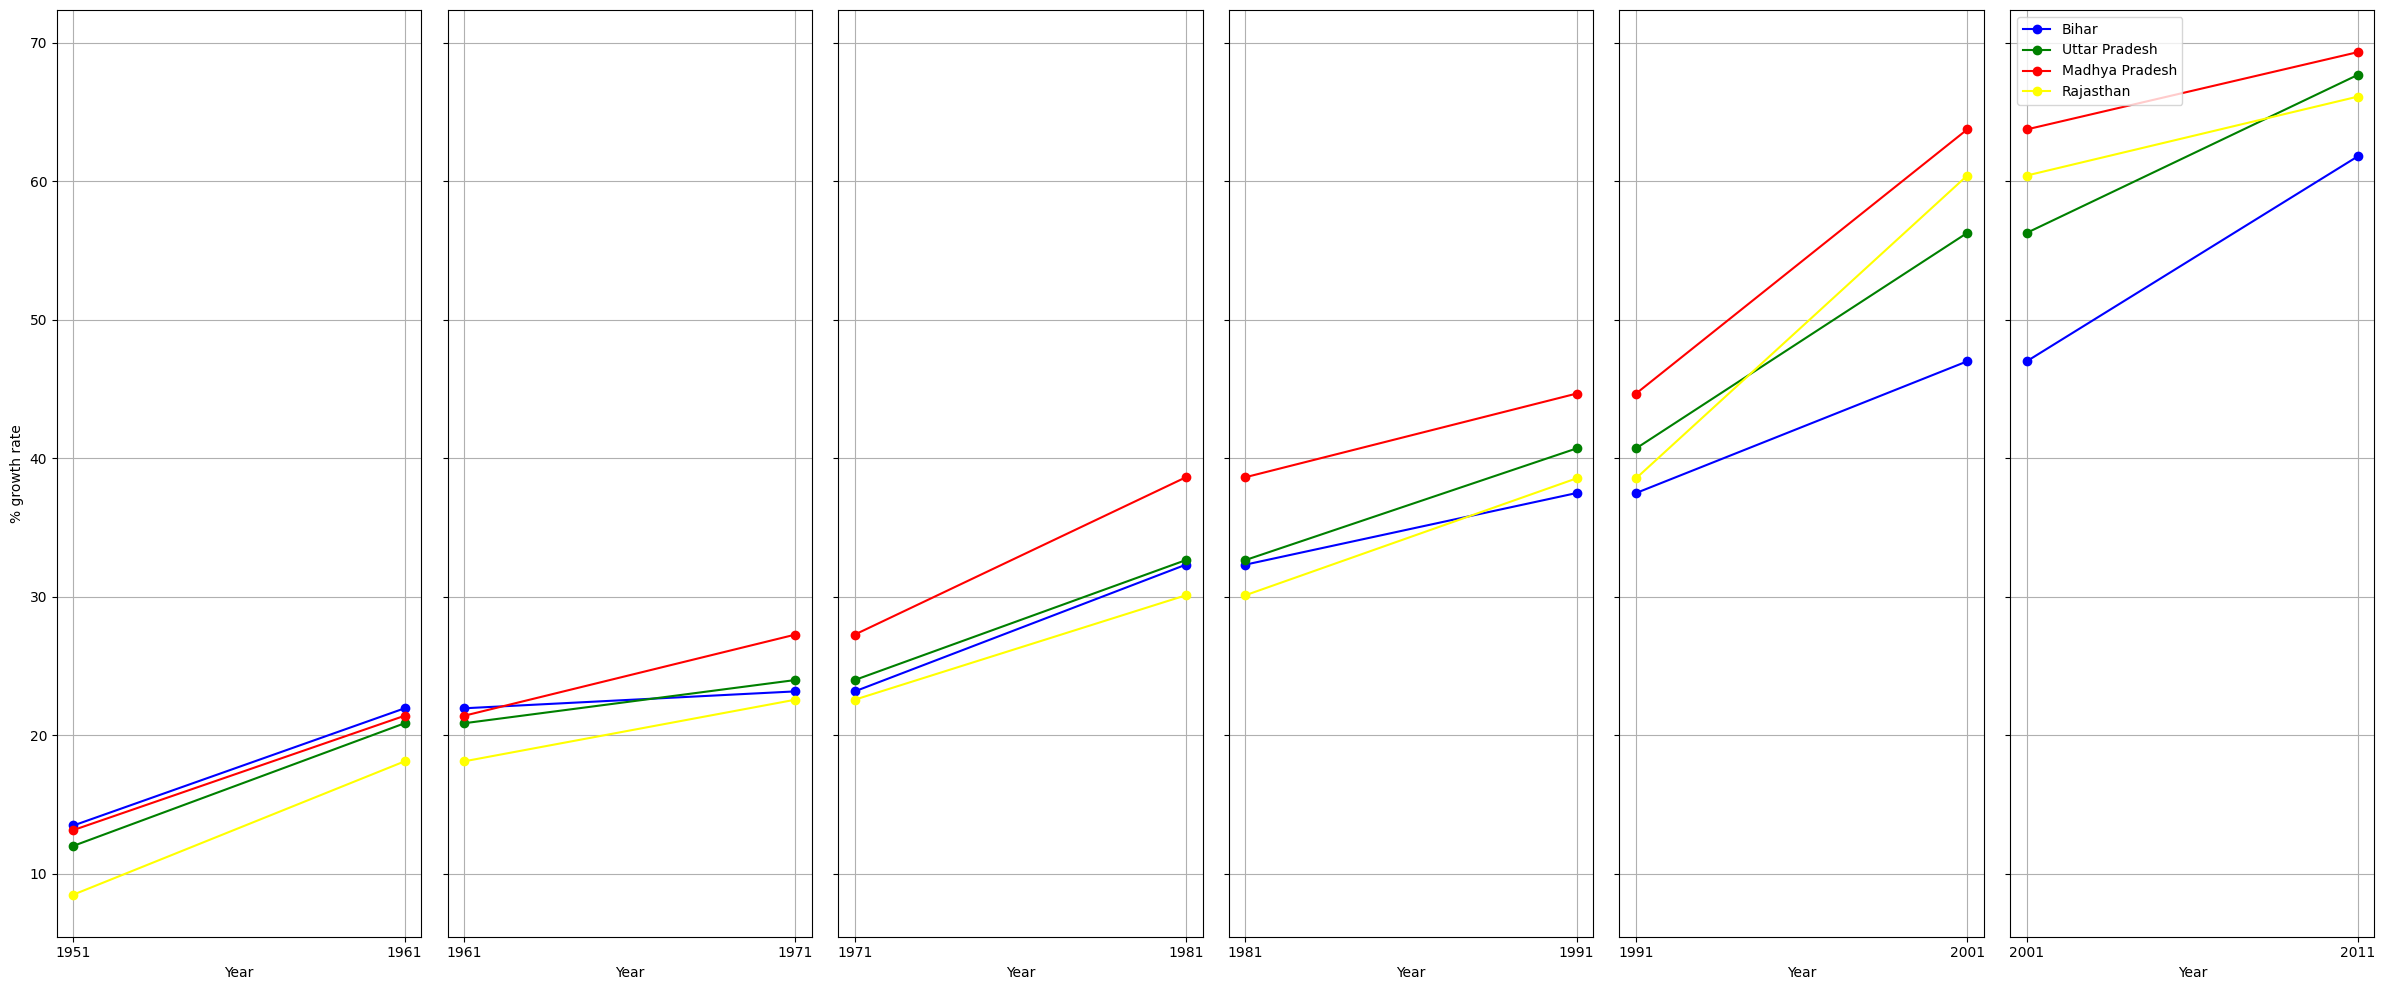

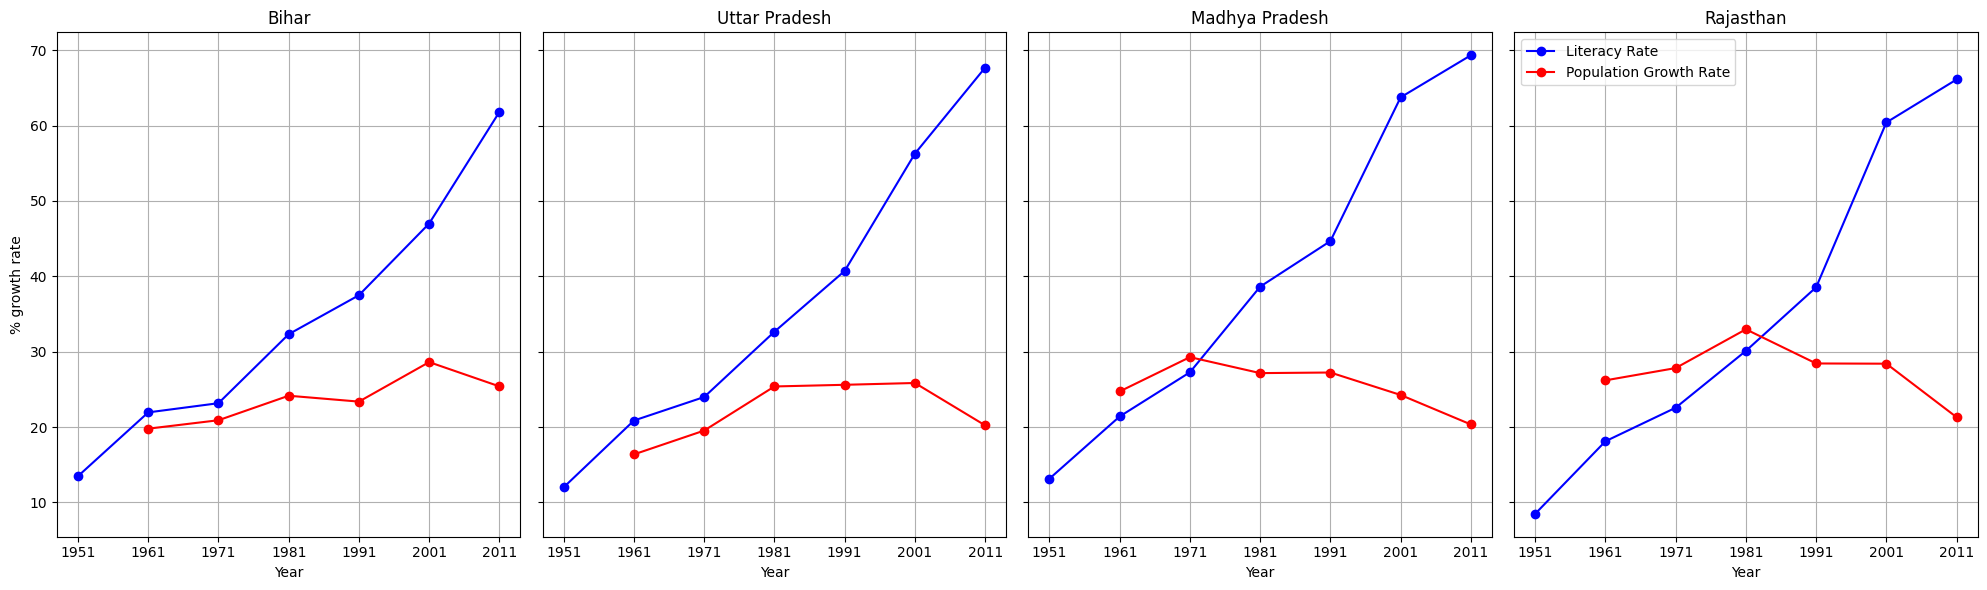

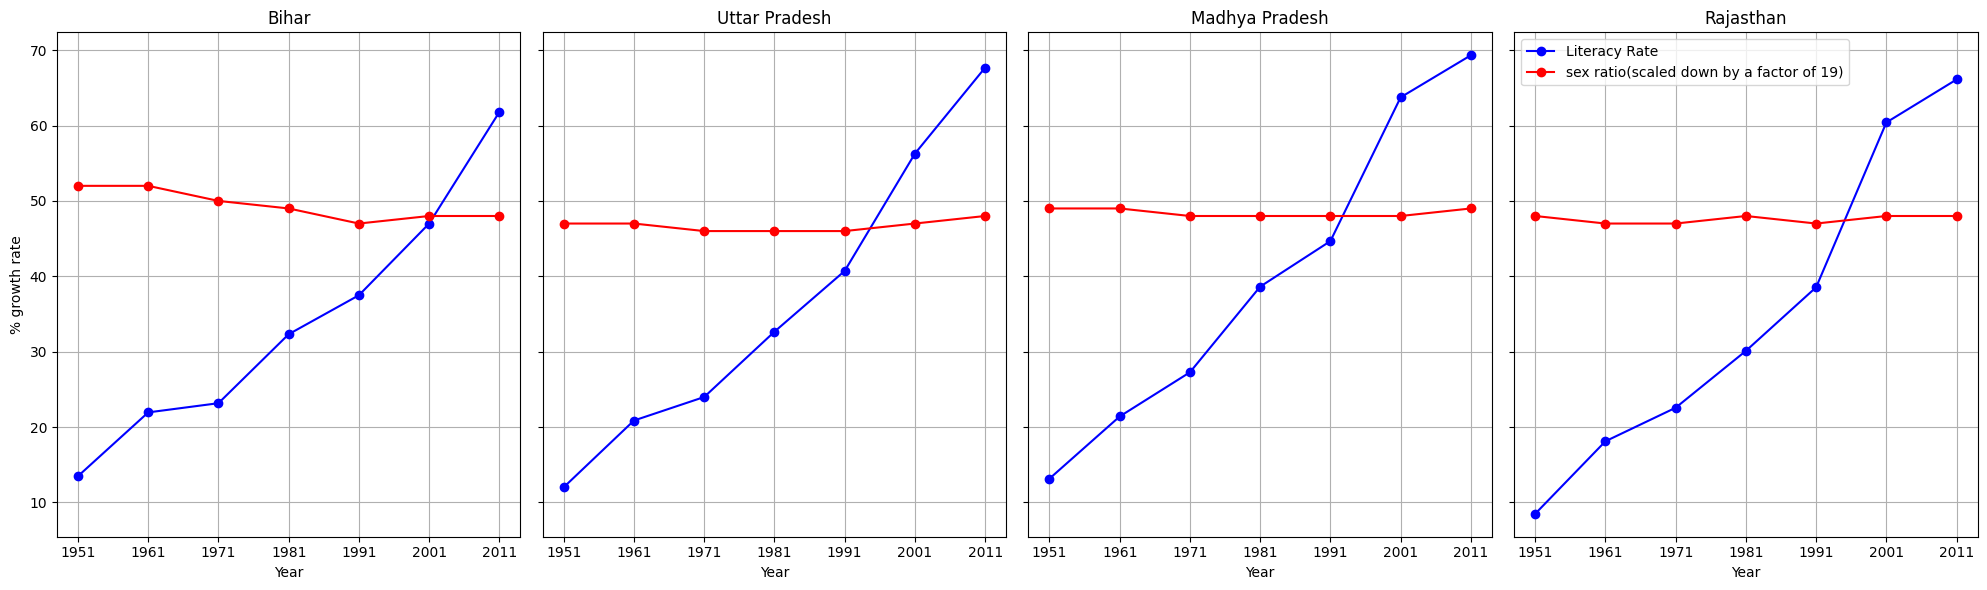

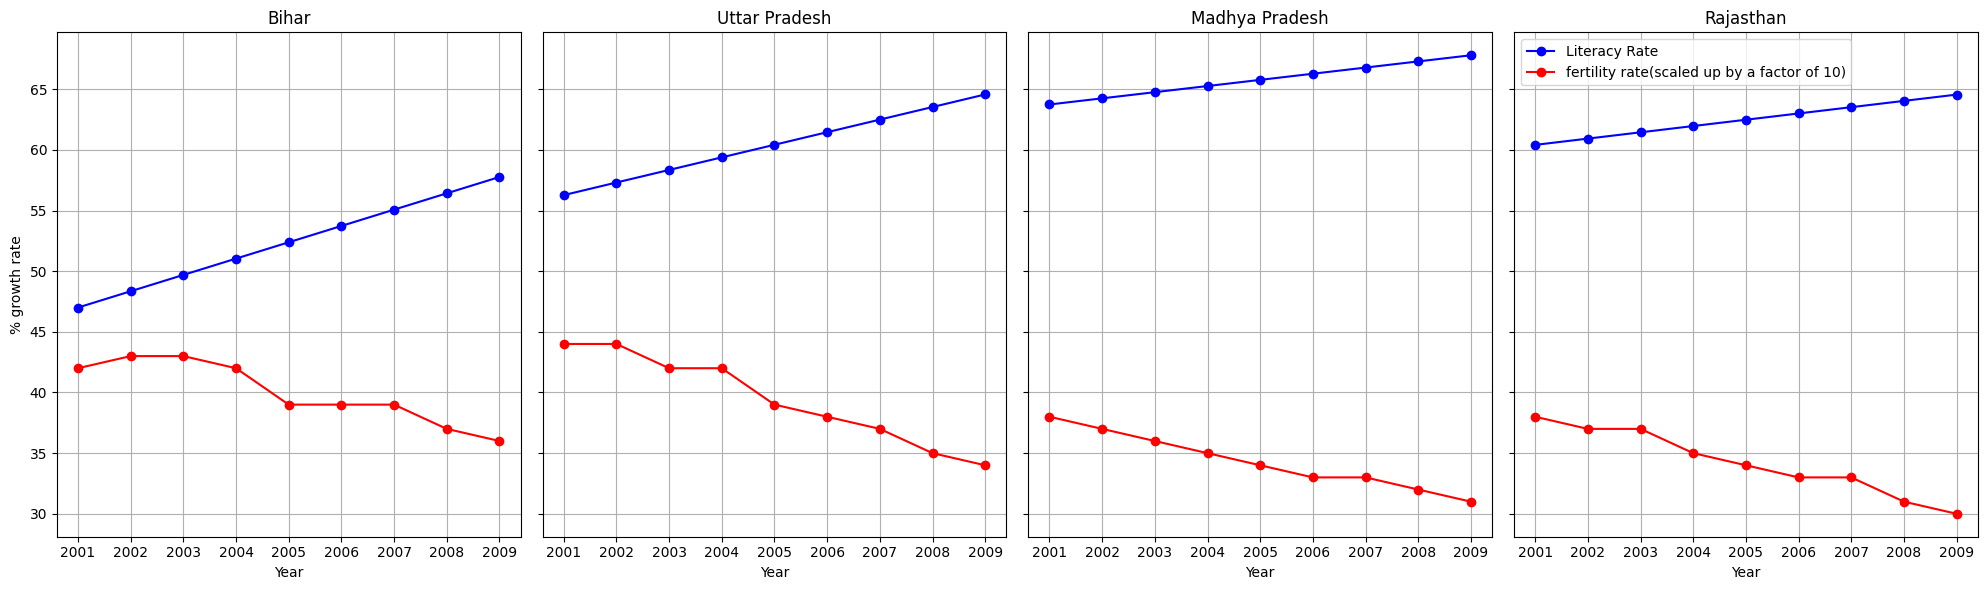

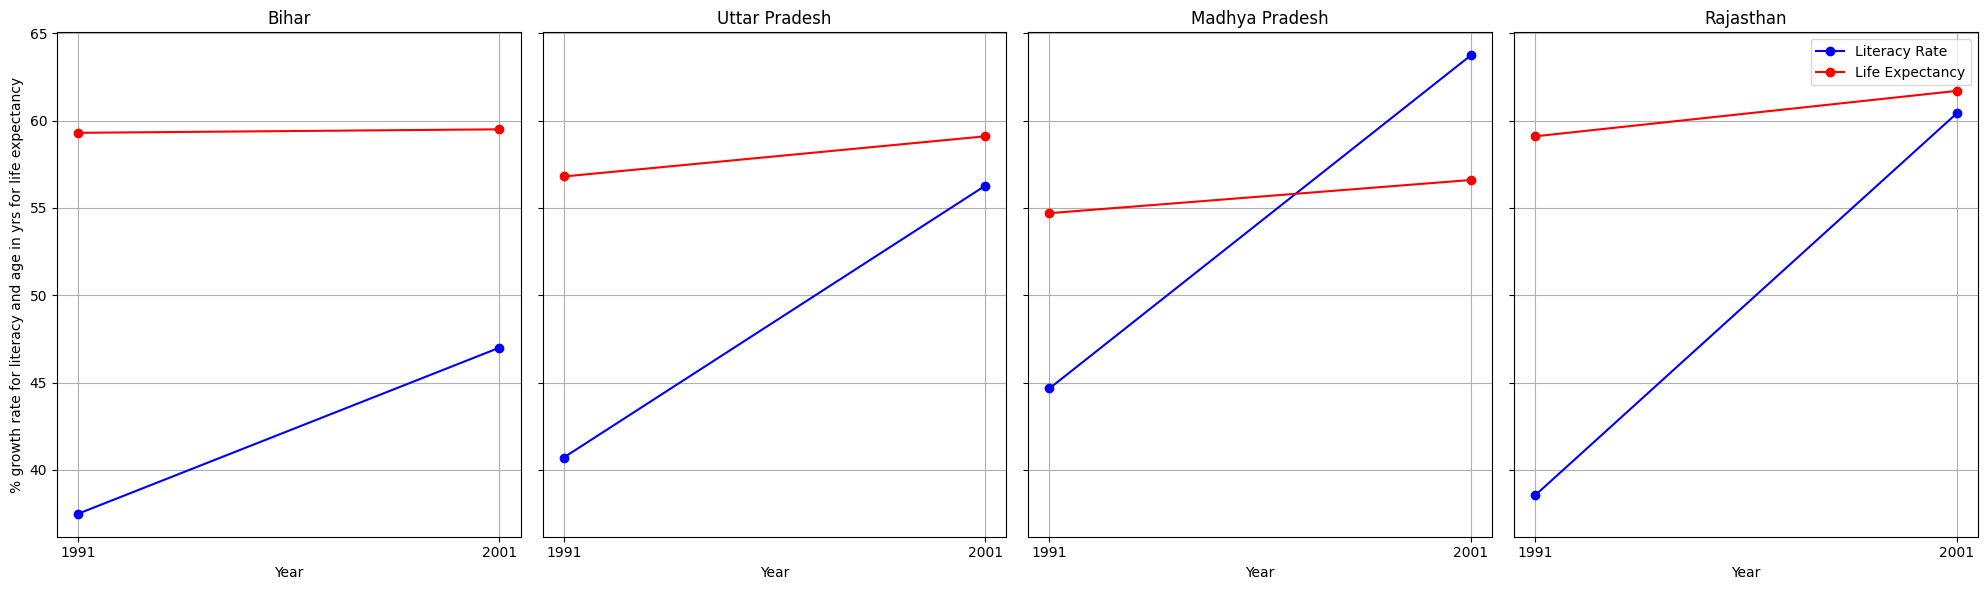

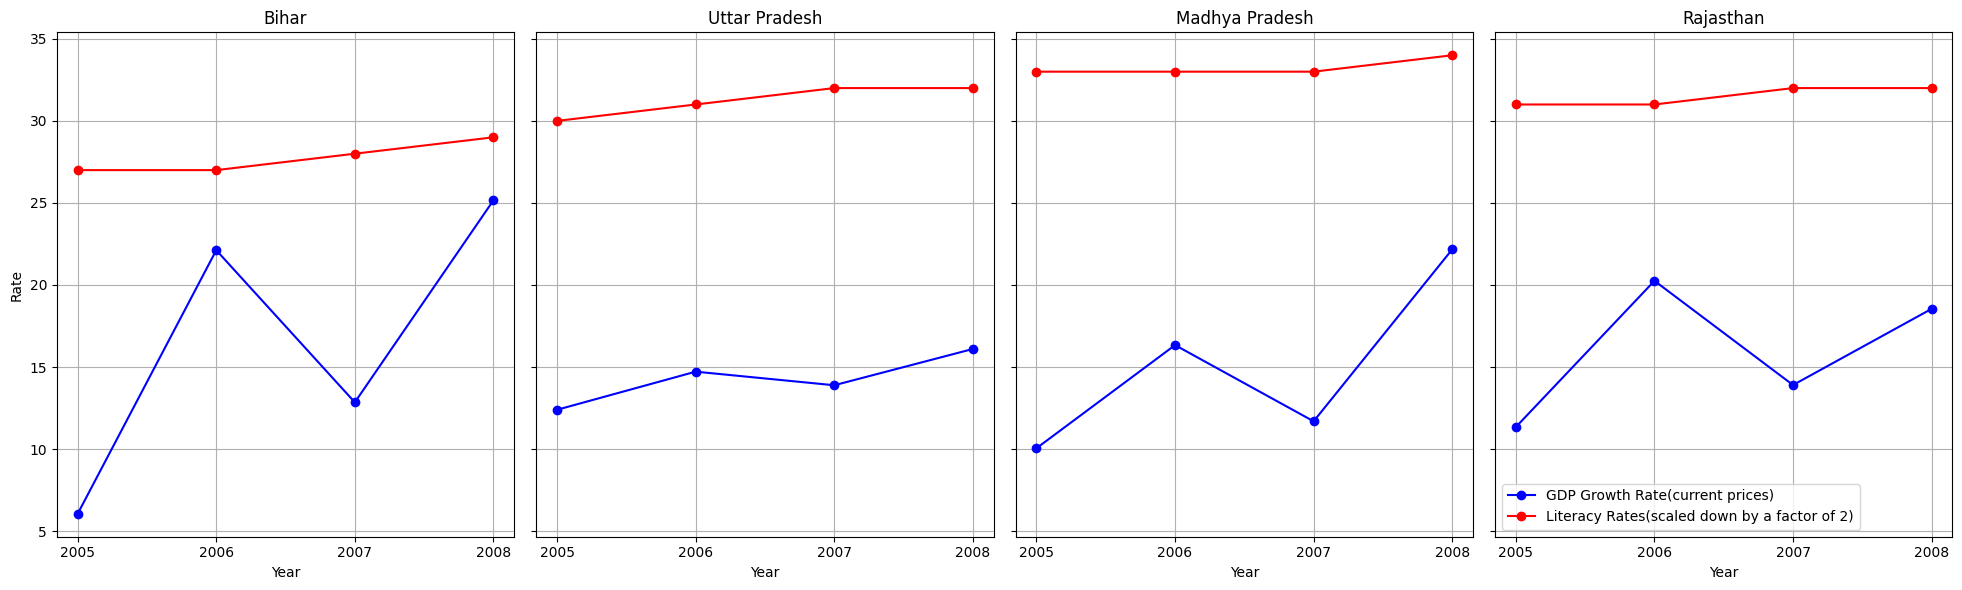

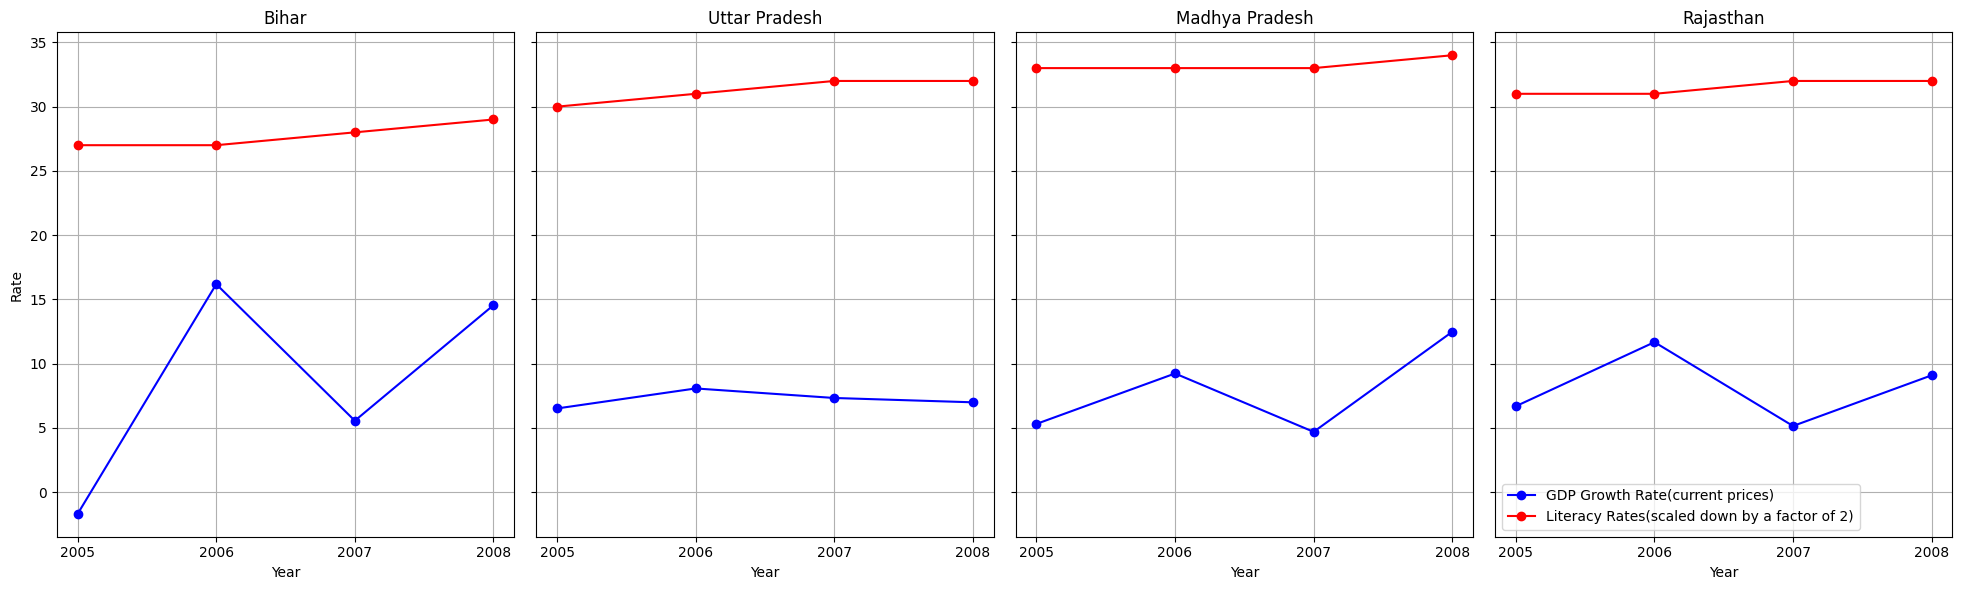

In [15]:
if __name__ == "__main__":
    main()

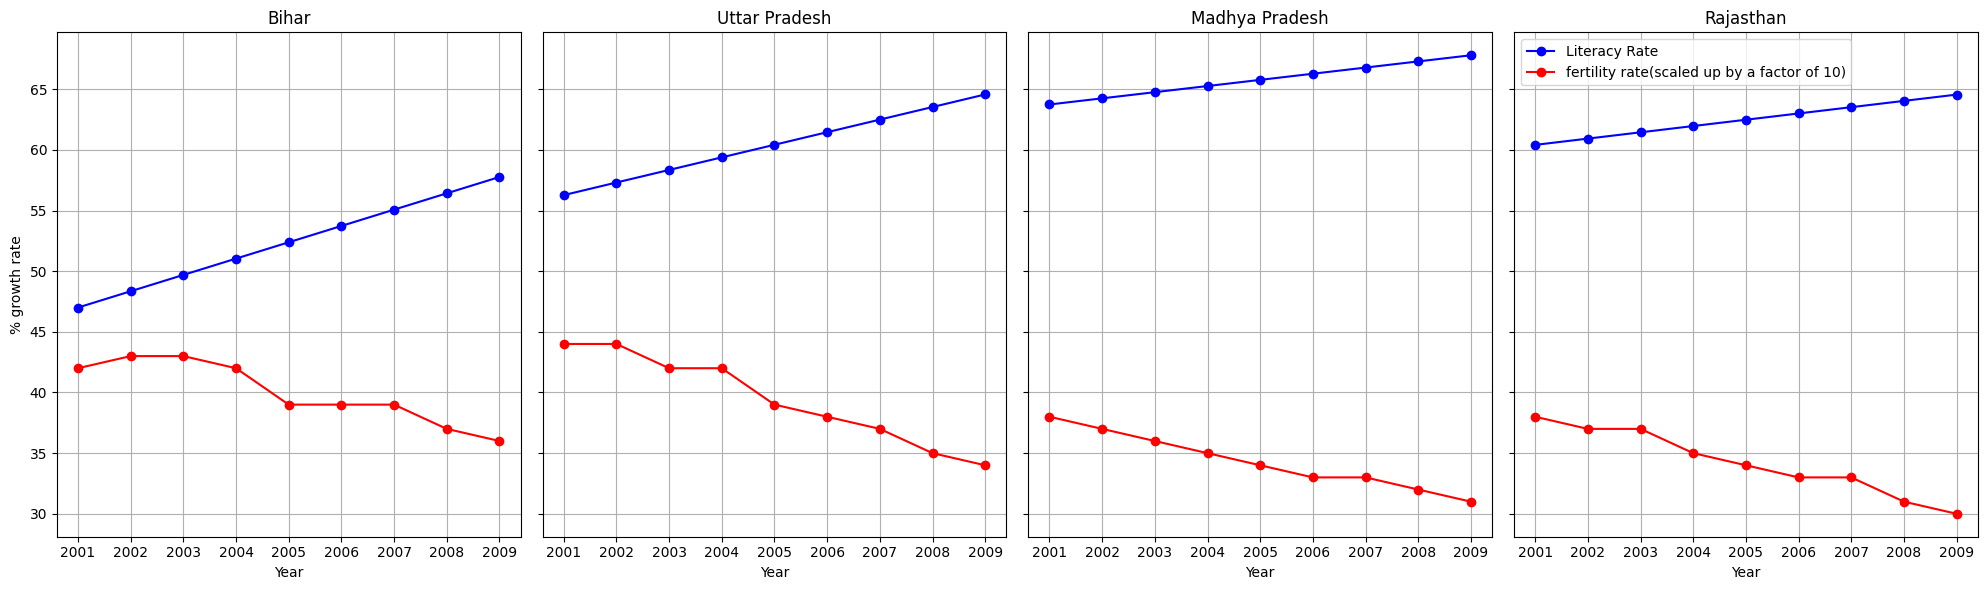

In [23]:
    # Declaring our model states array-:
    states = ['Bihar', 'Uttar Pradesh' , 'Madhya Pradesh' , 'Rajasthan']
    # Acquiring the data for only the relevant states
    df_literacy = create_dataFrame('literacy_rate.csv')
    df_literacy_states = df_literacy[df_literacy['State/UTs'].isin(states)]
    # Creating the DataFrame for fertilityRate-:
    df_fertility_rate = create_dataFrame('fertility rate.csv')

    # Cleaning the data for fertility rate-:
    clean_fertility_rate_data(df_fertility_rate)

    # Acquiring the data for our relevant states-:
    df_fertility_rate_states = df_fertility_rate[df_fertility_rate['A'].isin(states)]

    # Creating the subplots for all the states-:
    fig, axes = plt.subplots(1, 4, figsize=(20, 6), sharey=True)

    # Calling the function to plot the data-:
    plot_literacy_and_fertility_rate_data(states , df_literacy_states , df_fertility_rate_states , fig, axes)

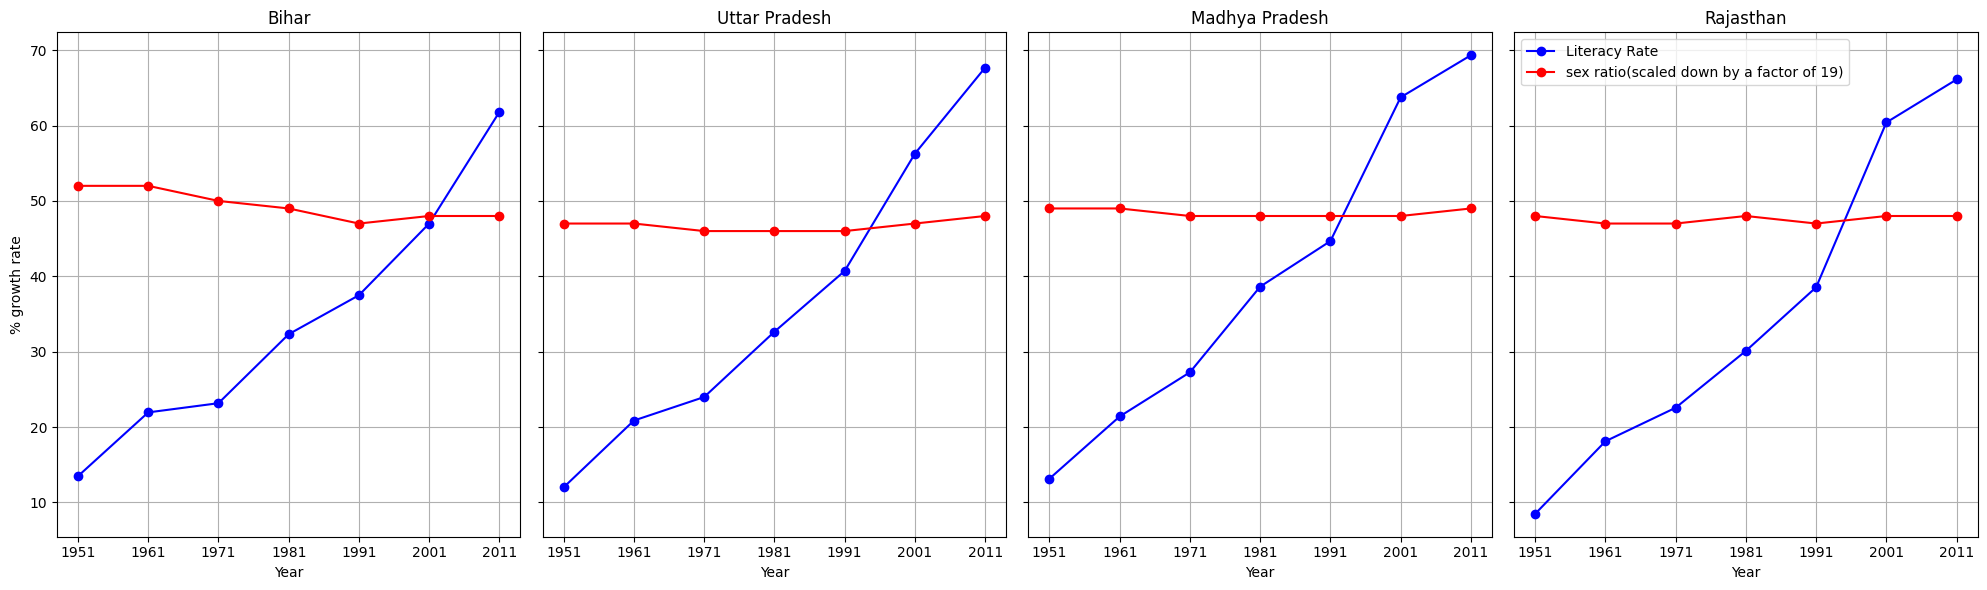

In [22]:
    # Declaring our model states array-:
    states = ['Bihar', 'Uttar Pradesh' , 'Madhya Pradesh' , 'Rajasthan']
    # Acquiring the data for only the relevant states
    df_literacy = create_dataFrame('literacy_rate.csv')
    df_literacy_states = df_literacy[df_literacy['State/UTs'].isin(states)]
    # Creating the data frame for sex ratio-:
    df_sex_ratio = create_dataFrame('sex ratio.csv')

    # Cleaning the data for the sexRatio Data Frame-:
    clean_sex_ratio_data(df_sex_ratio)

    # Acquiring the data for our relevant states
    df_sex_ratio_states = df_sex_ratio[df_sex_ratio['A'].isin(states)]

    # Creating subplots for all the states
    fig, axes = plt.subplots(1, 4, figsize=(20, 6), sharey=True)

    # Calling the function to plot the data
    plot_literacy_and_sex_ratio_data(states , df_literacy_states , df_sex_ratio_states , fig, axes)

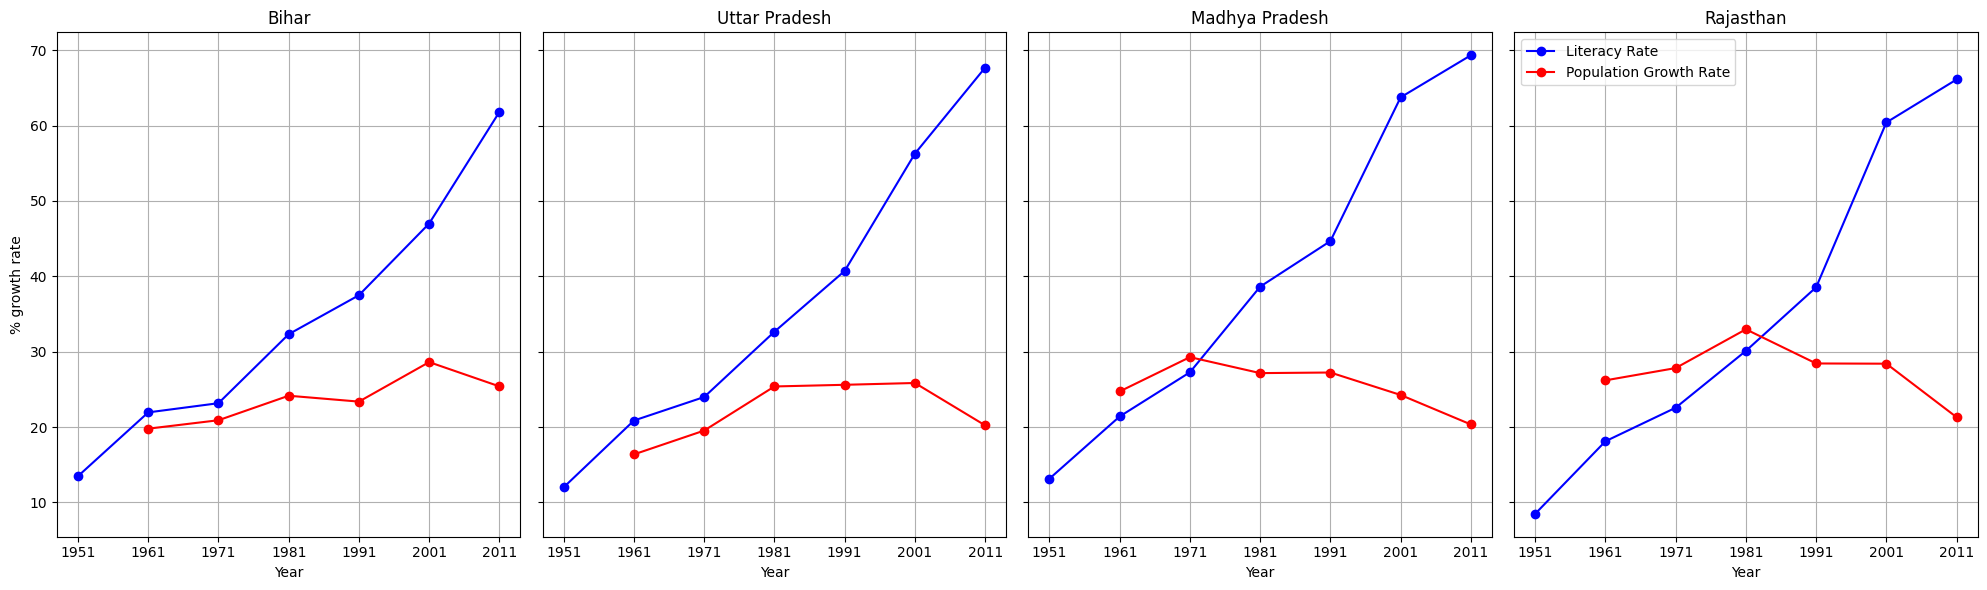

In [27]:
# Declaring our model states array-:
states = ['Bihar', 'Uttar Pradesh' , 'Madhya Pradesh' , 'Rajasthan']

# Creating the dataframes for literacy and population growth rates
df_literacy = create_dataFrame('literacy_rate.csv')
df_population = create_dataFrame('population growth rate.csv')

# Cleaning the data acquired from the above data frames
clean_literacy_data(df_literacy)
clean_population_data(df_population)

# Acquiring the data for only the relevant states
df_literacy_states = df_literacy[df_literacy['State/UTs'].isin(states)]
df_population_states = df_population[df_population['A'].isin(states)]

# Creating subplots for all states
fig, axes = plt.subplots(1, 4, figsize=(20, 6), sharey=True)

# Calling the functions to plot the data
plot_literacy_and_population_data(states , df_literacy_states , df_population_states , fig, axes)

In [28]:
def main():
    # Creating the dataframes for literacy and population growth rates
    df_literacy = create_dataFrame('literacy_rate.csv')

    # Declaring our model states array-:
    states = ['Bihar', 'Uttar Pradesh' , 'Madhya Pradesh' , 'Rajasthan']

    # Cleaning the data acquired from the above data frames
    clean_literacy_data(df_literacy)

    # Plotting the decadel data for literacy growth rate of the states-:
    plot_literacy_rate_states(states , df_literacy)

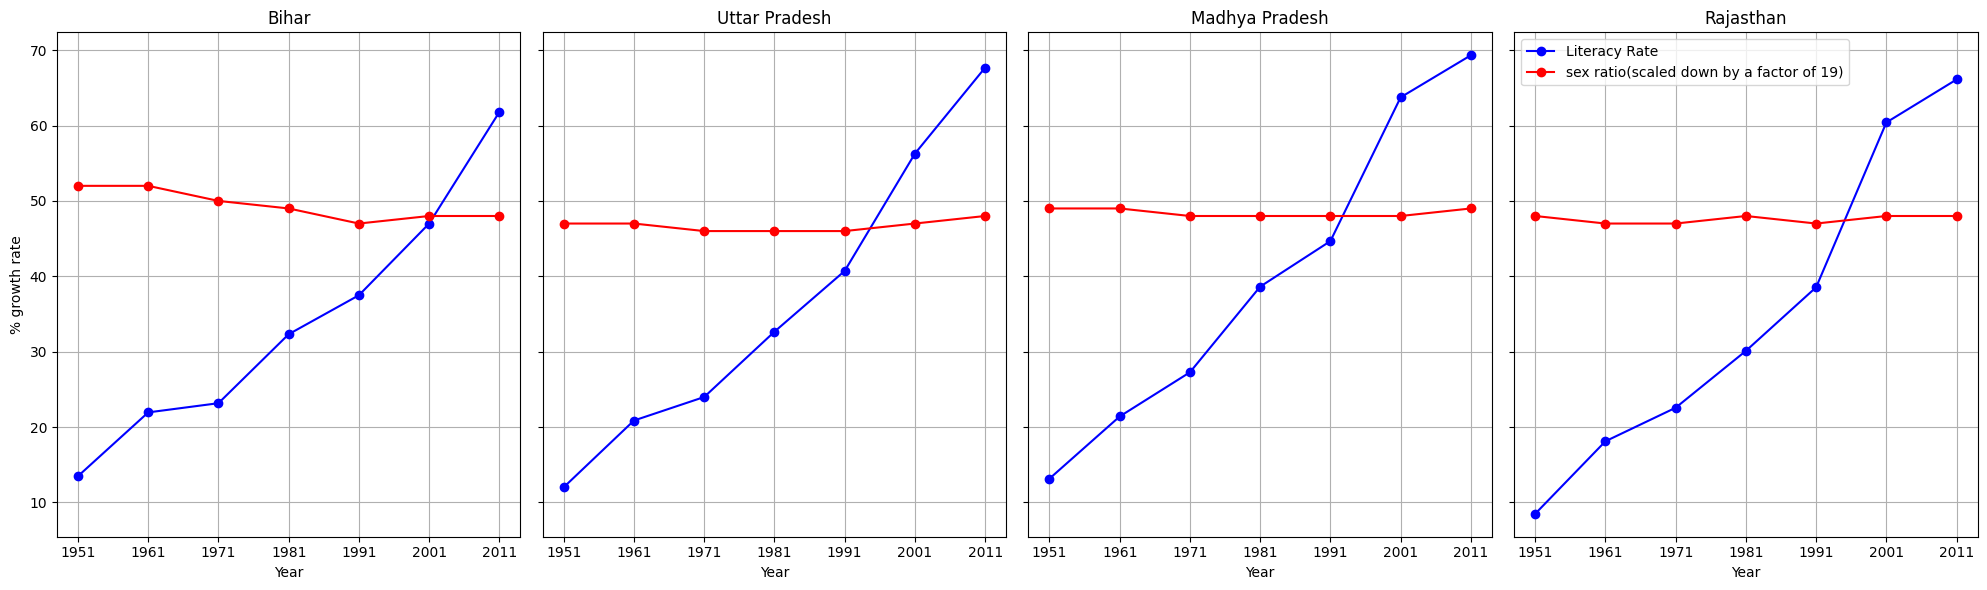

In [29]:
# Declaring our model states array-:
states = ['Bihar', 'Uttar Pradesh' , 'Madhya Pradesh' , 'Rajasthan']
# Acquiring the data for only the relevant states
df_literacy = create_dataFrame('literacy_rate.csv')
df_literacy_states = df_literacy[df_literacy['State/UTs'].isin(states)]
# Creating the data frame for sex ratio-:
df_sex_ratio = create_dataFrame('sex ratio.csv')

# Cleaning the data for the sexRatio Data Frame-:
clean_sex_ratio_data(df_sex_ratio)

# Acquiring the data for our relevant states
df_sex_ratio_states = df_sex_ratio[df_sex_ratio['A'].isin(states)]

# Creating subplots for all the states
fig, axes = plt.subplots(1, 4, figsize=(20, 6), sharey=True)

# Calling the function to plot the data
plot_literacy_and_sex_ratio_data(states , df_literacy_states , df_sex_ratio_states , fig, axes)

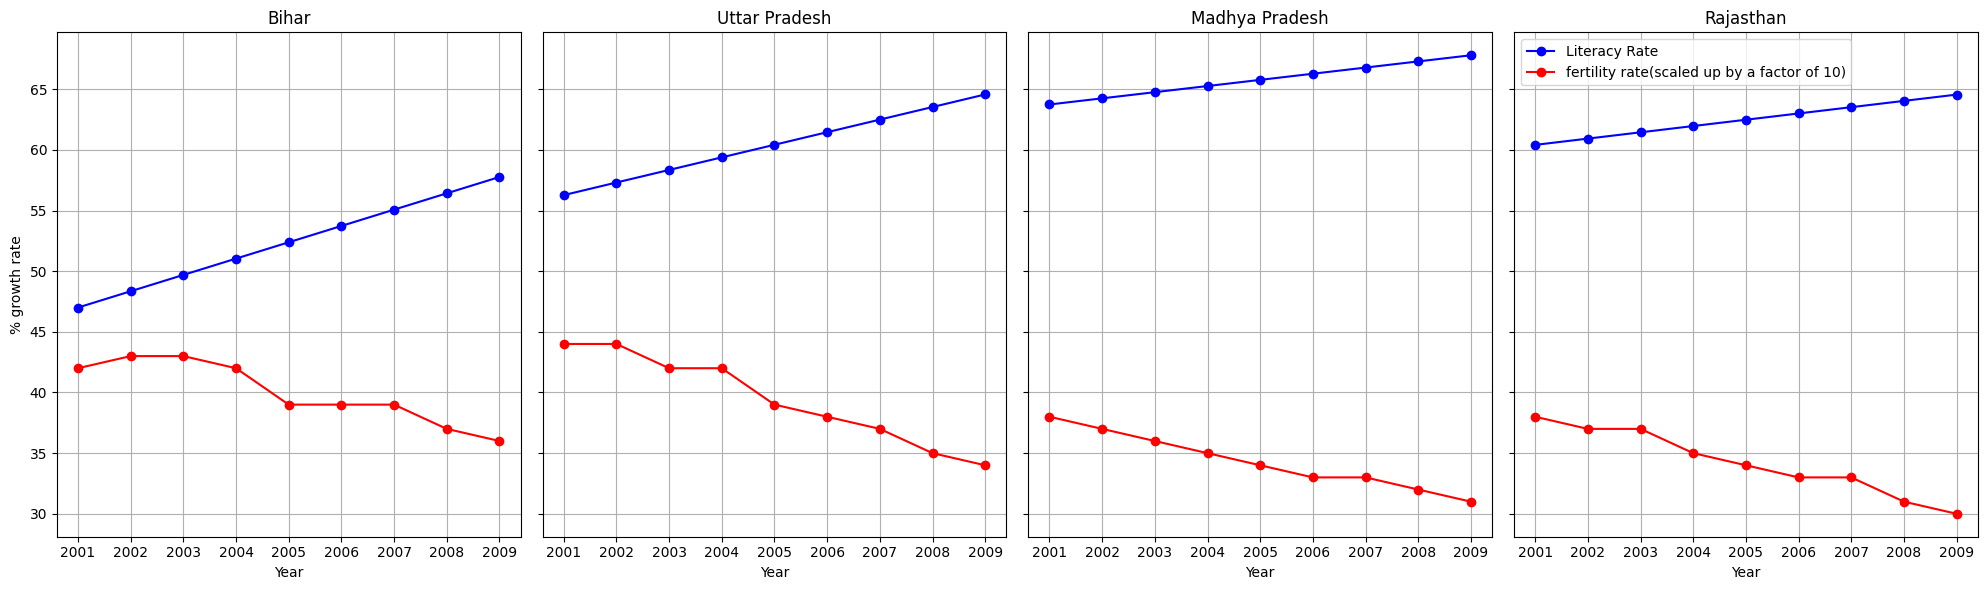

In [30]:
# Declaring our model states array-:
states = ['Bihar', 'Uttar Pradesh' , 'Madhya Pradesh' , 'Rajasthan']
# Acquiring the data for only the relevant states
df_literacy = create_dataFrame('literacy_rate.csv')
df_literacy_states = df_literacy[df_literacy['State/UTs'].isin(states)]
# Creating the DataFrame for fertilityRate-:
df_fertility_rate = create_dataFrame('fertility rate.csv')

# Cleaning the data for fertility rate-:
clean_fertility_rate_data(df_fertility_rate)

# Acquiring the data for our relevant states-:
df_fertility_rate_states = df_fertility_rate[df_fertility_rate['A'].isin(states)]

# Creating the subplots for all the states-:
fig, axes = plt.subplots(1, 4, figsize=(20, 6), sharey=True)

# Calling the function to plot the data-:
plot_literacy_and_fertility_rate_data(states , df_literacy_states , df_fertility_rate_states , fig, axes)